## Importing the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Importing the dataset

In [2]:
iris_df=pd.read_csv('IRIS.csv')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris_df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris_df.tail(15)

,sepal_length,sepal_width,petal_length,petal_width,species
135,7.7,3.0,6.1,2.3,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica
137,6.4,3.1,5.5,1.8,Iris-virginica
138,6.0,3.0,4.8,1.8,Iris-virginica
139,6.9,3.1,5.4,2.1,Iris-virginica
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica


## Dimension of the dataset

In [5]:
print("Dimension of the dataset:", iris_df.shape[0], "rows and", iris_df.shape[1], "columns")

Dimension of the dataset: 150 rows and 5 columns


## Checking for null values

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Description of the dataset

In [9]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
print("\n Class distribution:")
print(iris_df['species'].value_counts())


 Class distribution:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


## Bar plot of flower samples count for each Iris species

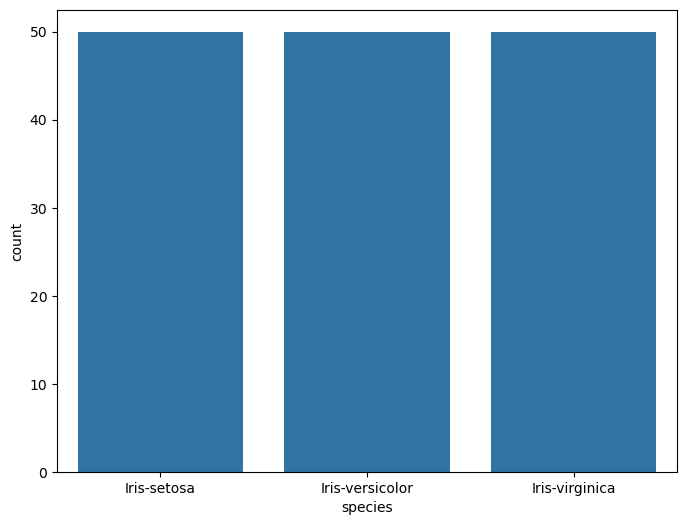

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=iris_df)
plt.show()

In [12]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## Distribution of Iris Flower features

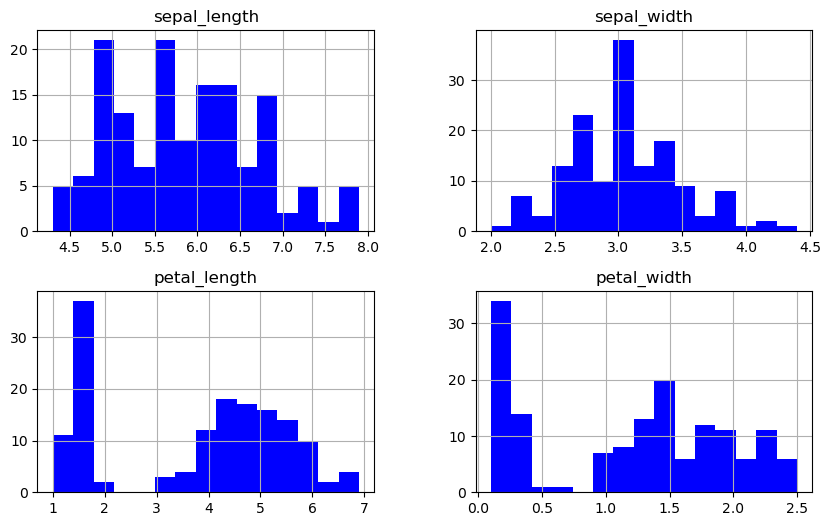

In [13]:
iris_df.drop("species",axis=1).hist(bins=15, figsize=(10,6), color="blue")
plt.show()

## Boxplot for each feature by species

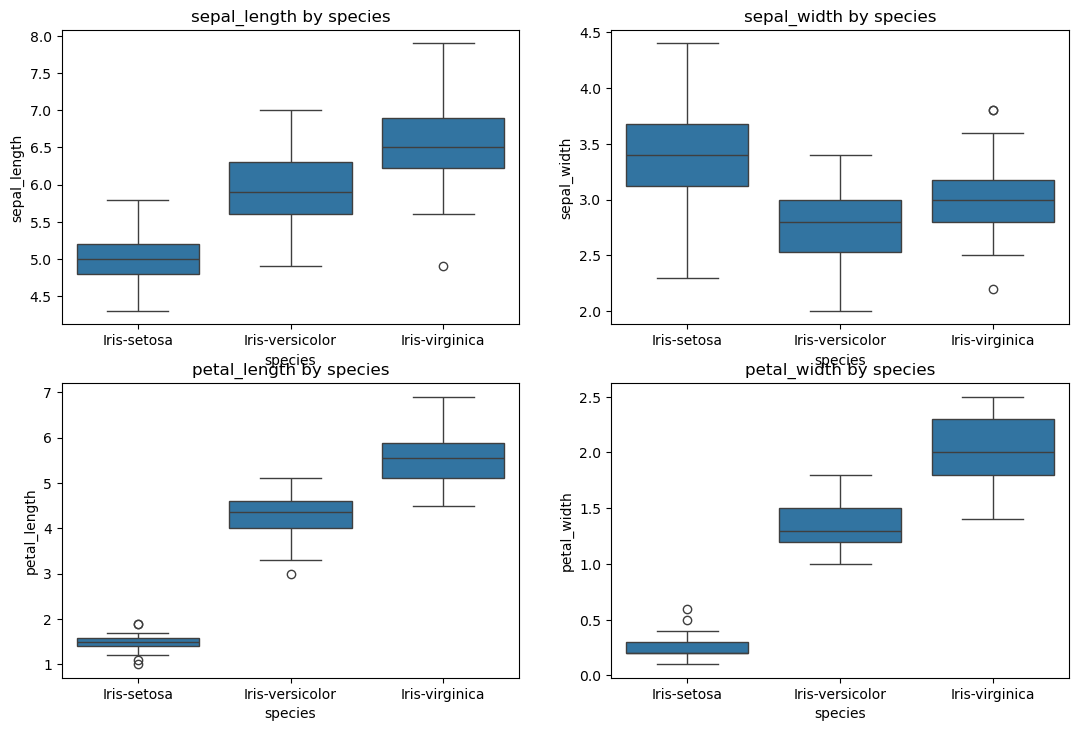

In [14]:
plt.figure(figsize=(13,13))

plt.subplot(3,2,1)
sns.boxplot(x="species",y="sepal_length",data=iris_df)
plt.title("sepal_length by species")

plt.subplot(3,2,2)
sns.boxplot(x="species",y="sepal_width",data=iris_df)
plt.title("sepal_width by species")

plt.subplot(3,2,3)
sns.boxplot(x="species",y="petal_length",data=iris_df)
plt.title("petal_length by species")

plt.subplot(3,2,4)
sns.boxplot(x="species",y="petal_width",data=iris_df)
plt.title("petal_width by species")

plt.show()

## Pairplot for visualizing relationships between features

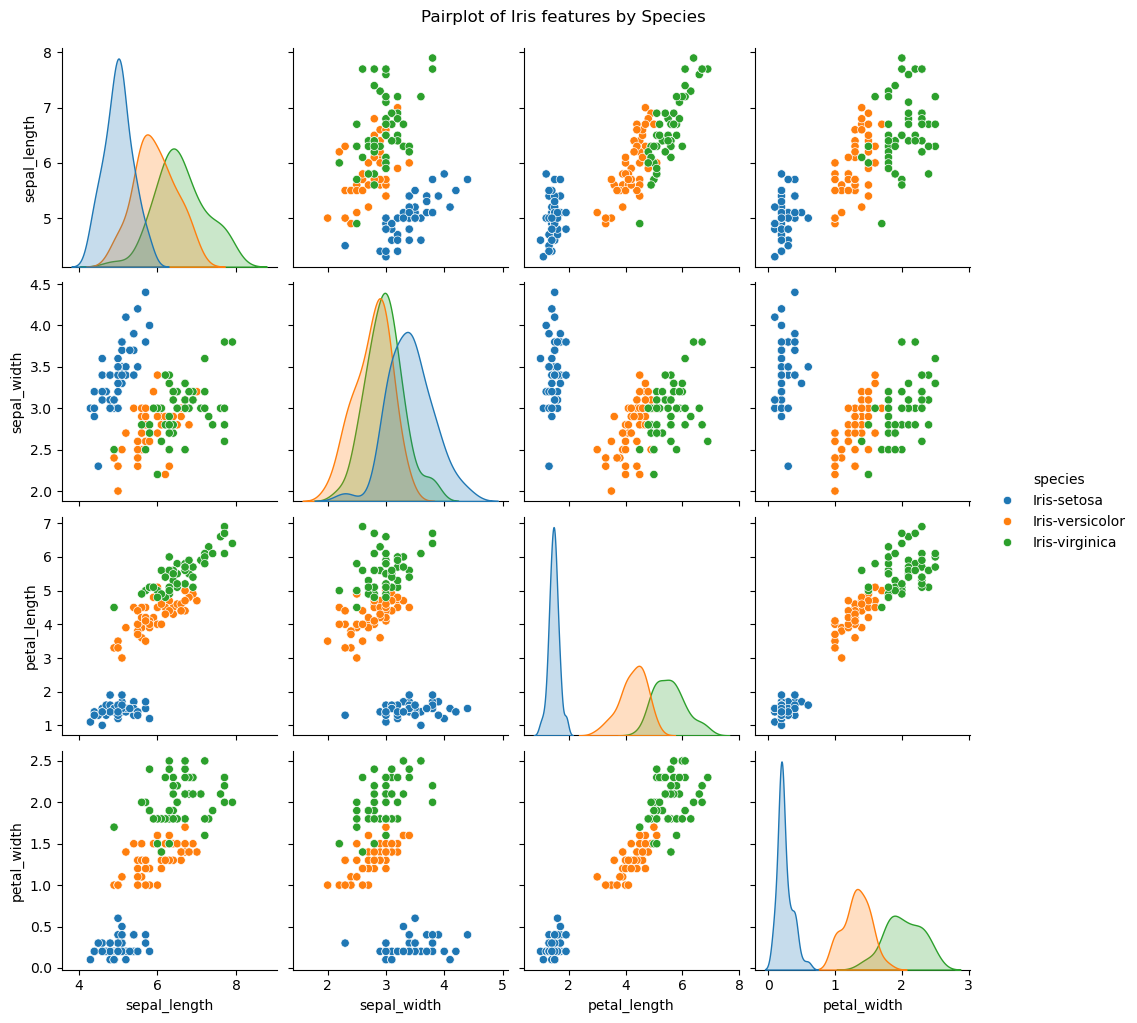

In [15]:
sns.pairplot(iris_df,hue="species")
plt.suptitle("Pairplot of Iris features by Species",y=1.02)
plt.show()

## Heatmap for analyzing correlation between the attributes

Correlation matrix
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


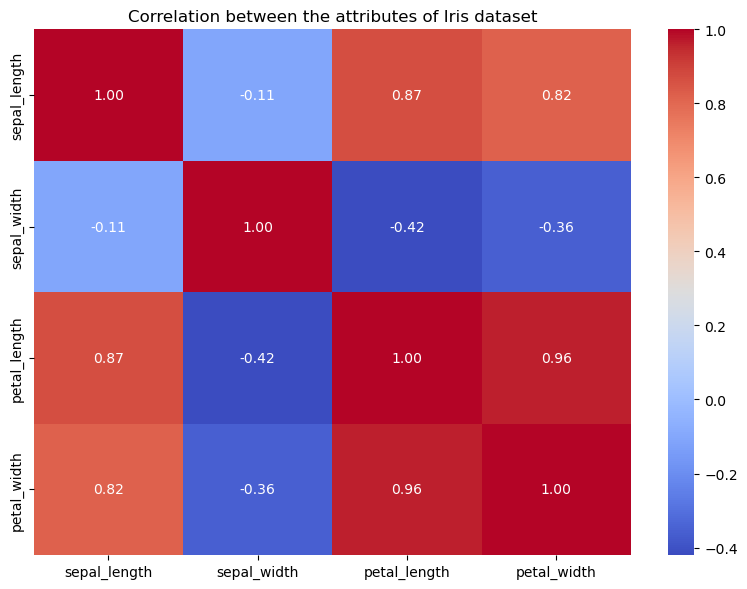

In [16]:
self_df=iris_df.select_dtypes(include='number')
print("Correlation matrix")
x=self_df.corr()
print(x)
plt.figure(figsize=(8,6))
sns.heatmap(x, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between the attributes of Iris dataset")
plt.tight_layout()
plt.show()

## Encoding the categorical variable into numeric variable

In [17]:
le=LabelEncoder()
iris_df['species']=le.fit_transform(iris_df['species'])

## Model Training
#### Defining features and target variables

In [18]:
X=iris_df.drop('species',axis=1)
y=iris_df['species']

#### Splitting the dataset into train and test

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=45)

In [20]:
model = RandomForestClassifier(n_estimators=100, random_state=45)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=45)

## Model Evaluation

In [21]:
y_train_pred=model.predict(X_train)
print(y_train_pred)


[1 1 2 2 0 2 0 0 1 0 0 1 0 1 1 0 2 1 2 0 0 1 2 0 2 0 0 1 0 1 1 2 1 2 0 0 0
 0 1 0 1 2 1 1 1 0 0 1 0 1 2 2 2 1 1 2 1 0 1 1 1 2 1 1 2 1 1 2 2 2 0 0 1 2
 2 2 0 1 2 1 1 1 0 2 2 0 0 2 0 2 1 1 2 2 1 0 0 2 0 1 2 2 0 0 0 2 0 0 2 1 1
 1 0 2 2 1 1 0 2 2]


In [22]:
train_accuracy=accuracy_score(y_train, y_train_pred)
print("Training accuracy:", train_accuracy)

Training accuracy: 1.0


#### Accuracy

In [23]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 93.33%


#### Classification report

In [24]:
print("\nClassification Report:\n", classification_report(y_test,y_pred,target_names=le.classes_)) 



Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.78      1.00      0.88         7
 Iris-virginica       1.00      0.83      0.91        12

       accuracy                           0.93        30
      macro avg       0.93      0.94      0.93        30
   weighted avg       0.95      0.93      0.93        30



#### Confusion matrix

[[11  0  0]
 [ 0  7  0]
 [ 0  2 10]]


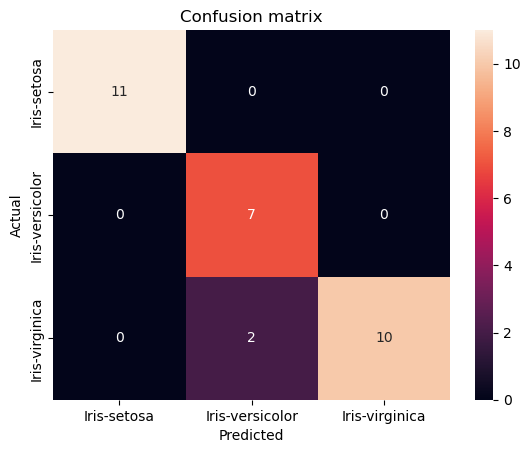

In [25]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=le.classes_,yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

## Test inputs and predicted output

In [26]:
#Example input: sepal_length=6.5 sepal_width=3.3, petal_length=5.9, petal_width=2.6
case = np.array([[6.5, 3.3, 5.9, 2.6]])
res = model.predict(case)

if res==0:
    print("Iris-setosa")
elif res==1:
    print("Iris-versicolor")
elif res==2:
    print("Iris-virginica")
else:
    print("None")

Iris-virginica


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [27]:
#Example input: sepal_length=4.5 sepal_width=2.6, petal_length=1.5, petal_width=0.8
case = np.array([[4.5, 2.6, 1.5, 0.8]])
res = model.predict(case)

if res==0:
    print("Iris-setosa")
elif res==1:
    print("Iris-versicolor")
elif res==2:
    print("Iris-virginica")
else:
    print("None")

Iris-setosa


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
